<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Part-1: Plots

In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

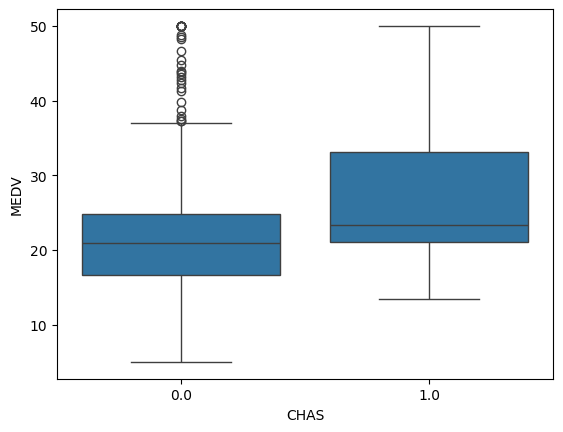

In [9]:
sns.boxplot(data=boston_df, x="CHAS", y="MEDV")

<AxesSubplot:ylabel='CHAS'>

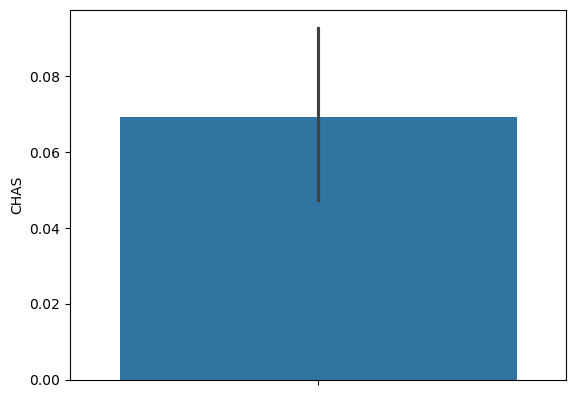

In [10]:
sns.barplot(data=boston_df, y ="CHAS")

In [11]:
def age_group(age):
    if age <= 30:
        return "<=30"
    elif age > 30 and age < 70:
        return "30-70"
    else:
        return ">=70"

In [12]:
boston_df["AGE_GROUP"] = boston_df["AGE"].map(age_group)

In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,30-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>=70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,30-70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,30-70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,30-70


<AxesSubplot:xlabel='AGE_GROUP', ylabel='MEDV'>

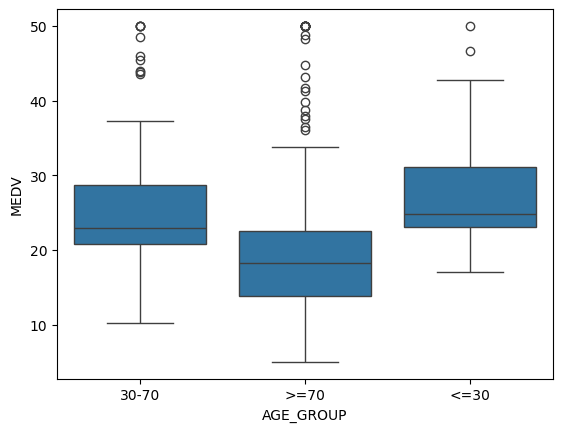

In [14]:
sns.boxplot(data=boston_df, x="AGE_GROUP", y="MEDV")

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

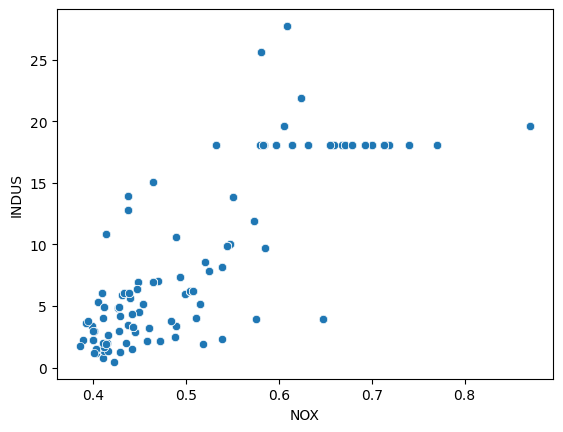

In [15]:
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

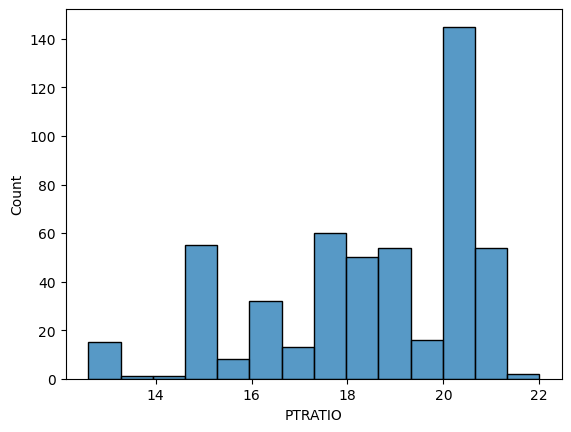

In [16]:
sns.histplot(data=boston_df, x="PTRATIO")

### Part-2: Tests

In [17]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Null Hypothesis: No difference

In [18]:
MEDV_CHAS0 = boston_df[boston_df["CHAS"] == 0.0]["MEDV"]
MEDV_CHAS1 = boston_df[boston_df["CHAS"] == 1.0]["MEDV"]
stat, p = scipy.stats.ttest_ind(MEDV_CHAS0, MEDV_CHAS1)
print("p = ", str(p))

p =  7.390623170519905e-05


In [19]:
# Conclusion: p-value < 0.05, Reject Null Hypothesis

In [20]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [22]:
MEDV_AGE30 = boston_df[boston_df["AGE_GROUP"] == "<=30"]["MEDV"]
MEDV_AGE3070 = boston_df[boston_df["AGE_GROUP"] == "30-70"]["MEDV"]
MEDV_AGE70 = boston_df[boston_df["AGE_GROUP"] == ">=70"]["MEDV"]
stat, p = scipy.stats.f_oneway(MEDV_AGE30, MEDV_AGE3070, MEDV_AGE70)
print("p = ", str(p))

p =  1.135217093487225e-14


In [23]:
# Conclusion: p-value < 0.05, Reject Null Hypothesis

In [24]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [25]:
stat, p = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("p = ", str(p))

p =  7.913361061210442e-98


In [26]:
# Conclusion: p-value < 0.05, Reject Null Hypothesis

In [27]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [28]:
slope, inter, r, p, std = scipy.stats.linregress(boston_df["DIS"], boston_df["MEDV"])
print("p = ", str(p))

p =  1.2066117273371223e-08


In [29]:
# Conclusion: p-value < 0.05, Reject Null Hypothesis